<a href="https://colab.research.google.com/github/rinchentb26/CXR-Classifier-MINI-PROJECT/blob/master/MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Improvisation of Chest-Radiograph Classification
Using Dimensionality Reduction**<br>
Bishant Raaj Bhujel (202000224) <br>
Mayal Punu Lepcha (202000283) <br>
Rinchen Tempa Bhutia (202000117)

In [ ]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#This code imports required libraries, opens the zip file 'dataset.zip' in read mode located in Google Drive, extracts all its contents into the temporary folder '/tmp', and finally closes the zip file.
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/dataset.zip', 'r') 
zip_ref.extractall('/tmp') 
zip_ref.close()

In [ ]:
#import required libraries
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.r

In [ ]:
# Define the paths for 'Normal', 'COVID', 'Lung_Opacity', and 'Viral Pneumonia' folders, respectively
# Calculate the number of files in each folder using the 'os.listdir' function and store them in variables 'len_normal', 'len_covid', 'len_lung_opacity', and 'len_viral_pneumonia'
path_normal = "/tmp/COVID-19_Radiography_Dataset/Normal"
path_covid = "/tmp/COVID-19_Radiography_Dataset/COVID"
path_lung_opacity = "/tmp/COVID-19_Radiography_Dataset/Lung_Opacity"
path_viral_pneumonia = "/tmp/COVID-19_Radiography_Dataset/Viral Pneumonia"

len_normal = len(os.listdir(path_normal))
len_covid = len(os.listdir(path_covid))
len_lung_opacity =  len(os.listdir(path_lung_opacity))
len_viral_pneumonia = len(os.listdir(path_viral_pneumonia))

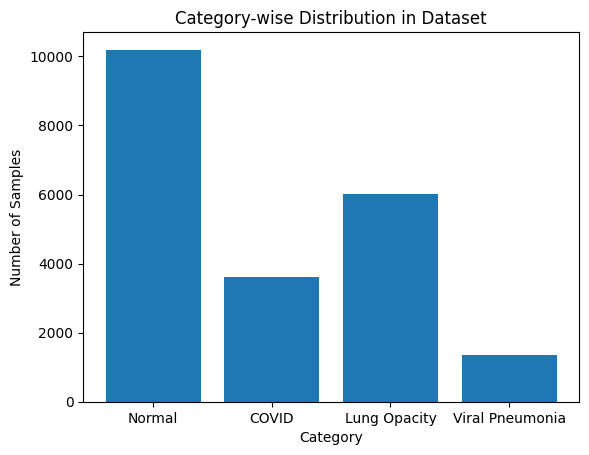

In [ ]:
# Define the dataset sizes
dataset_sizes = [len_normal, len_covid, len_lung_opacity, len_viral_pneumonia]

# Define the categories
categories = ['Normal', 'COVID', 'Lung Opacity', 'Viral Pneumonia']

# Create a bar plot of the dataset sizes by category
plt.bar(categories, dataset_sizes)

# Set the plot title and axis labels
plt.title('Category-wise Distribution in Dataset')
plt.xlabel('Category')
plt.ylabel('Number of Samples')

# Show the plot
plt.show()

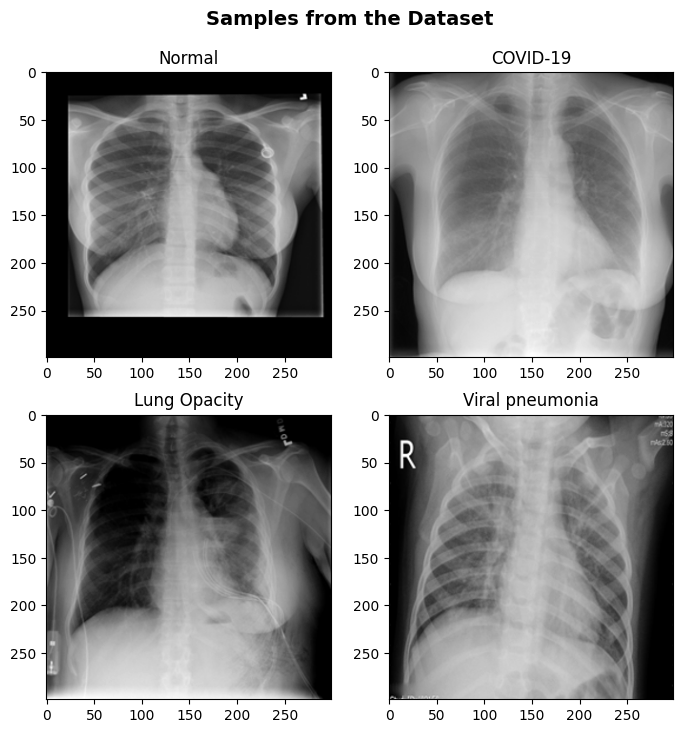

In [ ]:
# This code displays four sample images from the dataset, one from each of the four classes 'Normal', 'COVID-19', 'Lung Opacity', and 'Viral pneumonia' by reading the images from their respective folders and displaying them in a 2x2 grid using Matplotlib. 
# The title of each image is set to its corresponding class label. The final output is a visual representation of the sample data in the dataset
labels = ['Normal', 'COVID-19','Lung Opacity', 'Viral pneumonia']
img1 = path_normal+"/Normal-1.png"
img2 = path_covid+"/COVID-1994.png"
img3 = path_lung_opacity+"/Lung_Opacity-1.png"
img4 = path_viral_pneumonia + "/Viral Pneumonia-1.png"

imgs = [img1, img2, img3, img4]

fig, ax = plt.subplots(2, 2, figsize=(7,7))
ax = ax.ravel()
plt.tight_layout()

for i in range(0,4):
    ax[i].imshow(plt.imread(imgs[i]), cmap='gray')
    ax[i].set_title(labels[i])

plt.suptitle("Samples from the Dataset", fontsize=14, fontweight='bold',y=1.05)
plt.show()

In [ ]:
#This code defines a function that resizes an image located at the specified path to 150x150 pixels and converts it to grayscale using the PIL library. The function returns the resized image as a NumPy array.
from PIL import Image, ImageOps
def resize_image(imgpath):
    img = np.array(ImageOps.grayscale(Image.open(imgpath)).resize((150, 150), Image.ANTIALIAS))
    return img

In [ ]:
#This code loops through the images in each folder of the dataset, resizes each image to 150x150 pixels and converts them to grayscale using the resize_image function defined earlier. The images and their corresponding class labels are then stored in x_ and y respectively. 
# The final output is a NumPy array of resized grayscale images x_ and a corresponding list of class labels y.
import os
x_ = list()
y = list()

for i in os.listdir(path_normal):
    try:
        imgpath = path_normal+"/"+i
        img = resize_image(imgpath)
        x_.append(img)
        y.append(0)
    except:
        None
for i in os.listdir(path_covid):
    try:
        imgpath = path_covid+"/"+i
        img = resize_image(imgpath)
        x_.append(img)
        y.append(1)
    except:
        None
for i in os.listdir(path_lung_opacity):
    try:
        imgpath = path_lung_opacity+"/"+i
        img = resize_image(imgpath)
        x_.append(img)
        y.append(2)
    except:
        None  
for i in os.listdir(path_viral_pneumonia):
    try:
        imgpath = path_viral_pneumonia+"/"+i
        img = resize_image(imgpath)
        x_.append(img)
        y.append(3)
    except:
        None
x_ = np.array(x_)

(2207, 1929, 3)


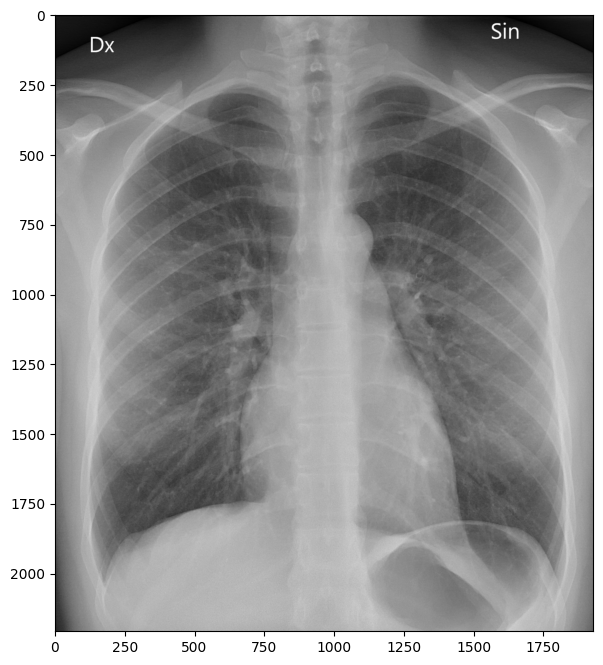

In [ ]:
#PRINCIPAL COMPONENT ANALYSIS
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

image_raw = imread("tester-xray.jpg")
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)



(2207, 1929)
1.0


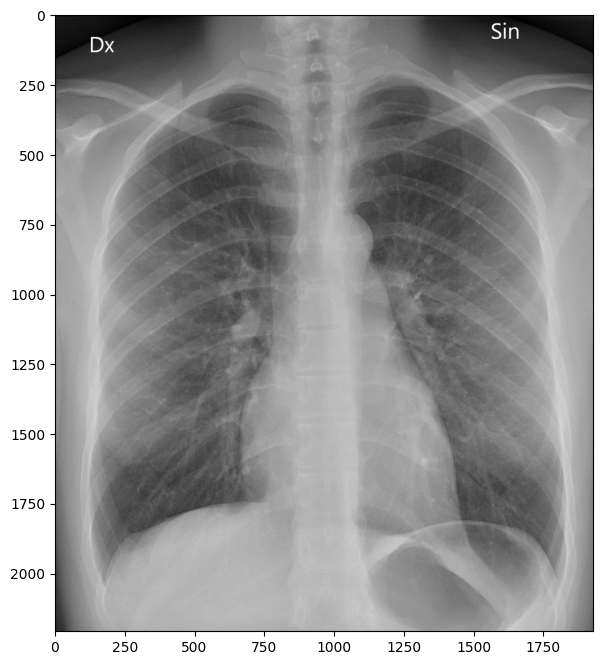

In [ ]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

Number of components explaining 95% variance: 11


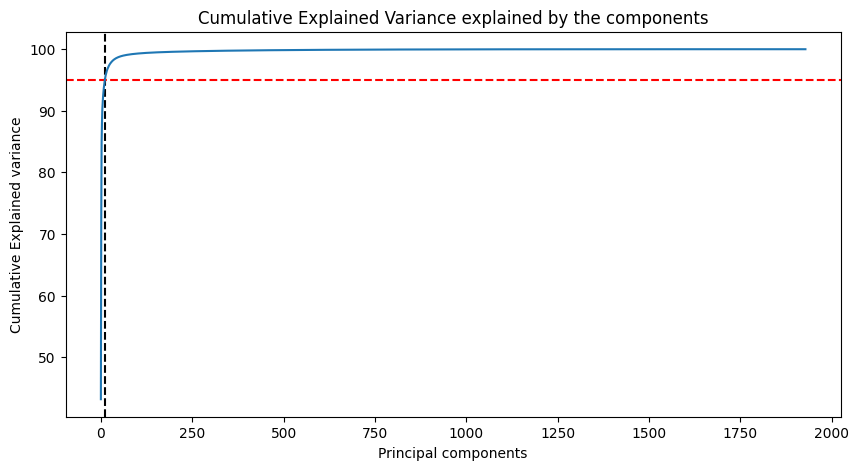

In [ ]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

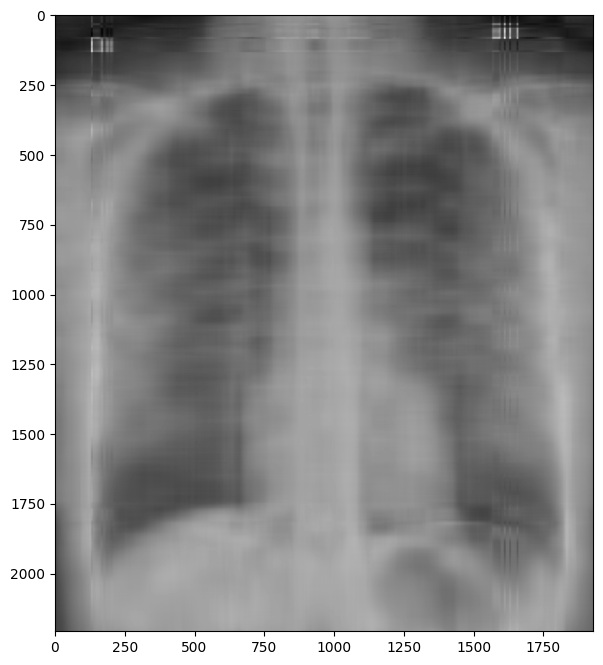

In [ ]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

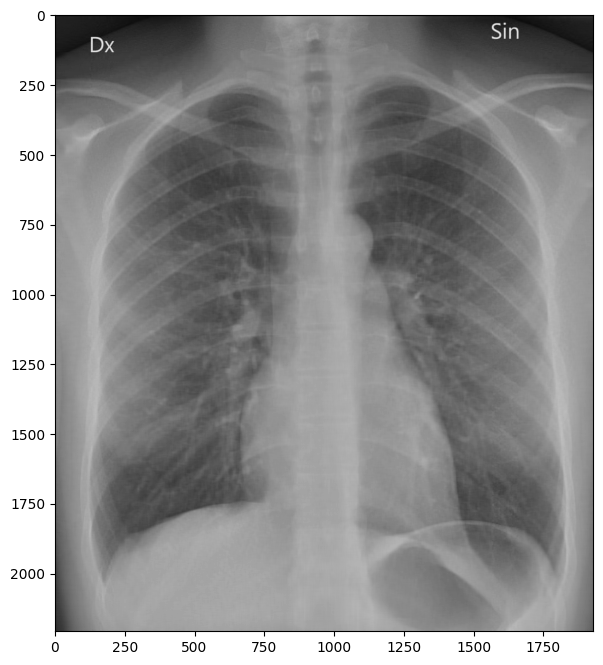

In [ ]:
# Function to reconstruct and plot image for a given number of components

def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    

k = 150
plt.figure(figsize=[12,8])
plot_at_k(100)

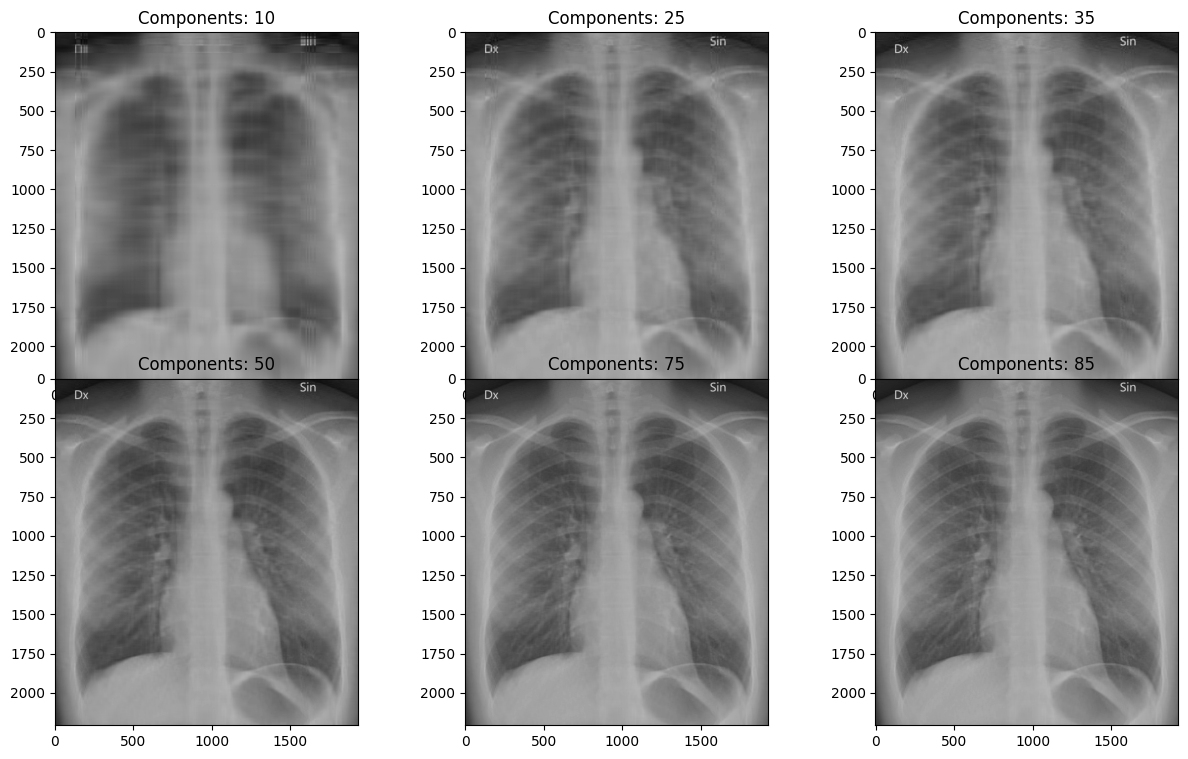

In [ ]:
ks = [10, 25, 35, 50, 75, 85]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np

# Split the data into training, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(x_, y, test_size=0.2, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=40)

# Convert the labels to one-hot encoded vectors
num_classes = 4
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Reshape the data to have a single color channel
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)

In [ ]:
# This code defines a Convolutional Neural Network (CNN) model using the Keras library. The model consists of two convolutional layers each followed by a max-pooling layer. These layers are then followed by a flatten layer, a dense layer, a dropout layer, and a final dense layer. The Conv2D and MaxPooling2D layers are used for feature extraction from the input images, while the Flatten layer flattens the output of the convolutional layers to a 1D array. The Dense layers are used for classification, and the Dropout layer helps prevent overfitting by randomly dropping some of the neurons during training. 
# Finally, the compile method is used to configure the loss function, optimizer, and metrics used to evaluate the model during training.
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=x_train[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# This trains the model on the training data x_train with corresponding labels y_train using batch size of 32 and for 100 epochs. 
# It also uses validation data (x_val, y_val) to evaluate the model's performance during training and stores the training history in the history variable.
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=2,
                    validation_data=(x_val, y_val))

Epoch 1/2
450/450 [==============================] - 9s 19ms/step - loss: 0.4140 - accuracy: 0.8388 - val_loss: 0.4935 - val_accuracy: 0.8161
Epoch 2/2
450/450 [==============================] - 8s 18ms/step - loss: 0.3741 - accuracy: 0.8603 - val_loss: 0.5047 - val_accuracy: 0.8118


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 82944)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
from sklearn.metrics import confusion_matrix
# make predictions on test data
y_pred = model.predict(x_test)

# convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# convert true labels to class labels
y_true_classes = np.argmax(y_test, axis=1)

# calculate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# print confusion matrix
print(cm)

133/133 [==============================] - 1s 4ms/step
[[1808   95  139    7]
 [  79  569   78    2]
 [ 288   89  817    2]
 [  22   14    8  216]]


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


133/133 [==============================] - 1s 6ms/step - loss: 0.5496 - accuracy: 0.8056
Test Loss: 0.5496237874031067
Test Accuracy: 0.8055752515792847


In [ ]:
#Calculate F1 SCORE
from sklearn.metrics import f1_score

# predict labels for test data
y_pred = model.predict(x_test)

# convert one-hot encoded labels to integers
y_true = np.argmax(y_test, axis=1)

# threshold the predictions for binary classification
if y_pred.shape[-1] == 1:
    y_pred = (y_pred > 0.5)
else:
    y_pred = np.argmax(y_pred, axis=1)

# calculate f1 score
f1 = f1_score(y_true, y_pred, average='weighted')

print("F1 score: {:.2f}".format(f1))


133/133 [==============================] - 1s 5ms/step
F1 score: 0.80


1/1 [==============================] - 0s 17ms/step


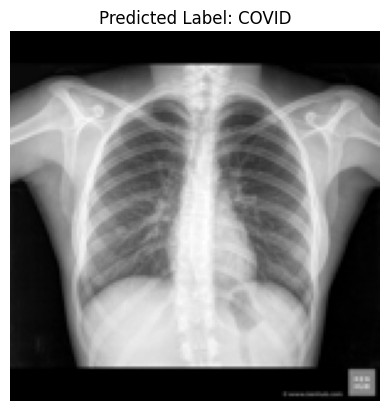

In [ ]:
img = Image.open("normalxray.jpg").convert('L')  # Convert to grayscale
img = img.resize((150, 150))
x = np.array(img)
x = np.expand_dims(x, axis=-1)  # Add channel dimension
x = np.expand_dims(x, axis=0)  # Add batch dimension

# Predict class probabilities
y_pred = model.predict(x)

y_pred_class = np.argmax(y_pred, axis=1)[0]


class_dict = {0:"Normal", 1:"COVID", 2: "Lung Opacity", 3: "Viral Pneumonia"}
plt.imshow(img, cmap='gray')
plt.title("Predicted Label: " + class_dict[y_pred_class])
plt.axis("off")
plt.show()